# Guia do funcionamento da Simulação do Blind Quantum Computing
##### O documento tem o objetivo de demostrar o funcionamento da simulação dos protocolos Childs e BFK no BQC.
#### IMPORTANDO AS DEPENDÊNCIAS


In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

##### É inicializada a rede, com uma topologia de grade, que apresenta 1 servidor (nó verde) e 8 clientes (nós vermelhos).

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


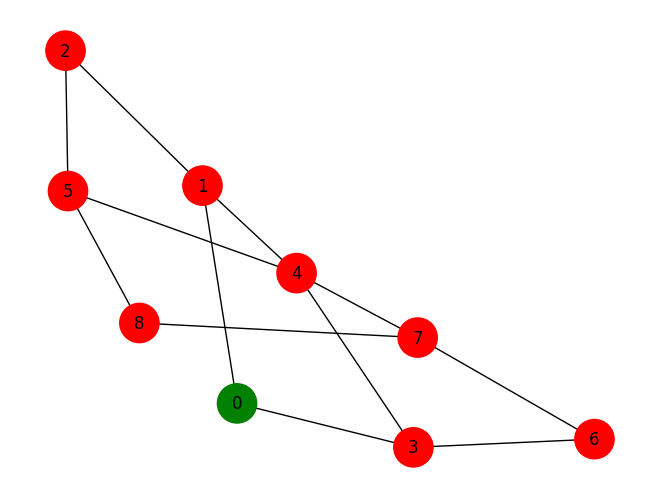

In [2]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

##### A realização da simulação de uma requesição acontece de forma em que vamos passar uma função para a geração de um circuito aleatório com o número de qubits e número de portas passados como parâmetros e a escolha de um protocolo para executar esse circuito. O protocolo escolhido foi o AC_BQC, Childs, e o cliente é (alice_id).

In [3]:
circuit, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=20) 
rede.application_layer.run_app("AC_BQC", alice_id=1, bob_id=0, num_qubits=num_qubits)

     ┌───┐                                     ┌───┐             
q_0: ┤ S ├──────────────────────────────■──────┤ X ├─────────────
     ├───┤                   ┌───┐┌───┐ │ ┌───┐└─┬─┘             
q_1: ┤ X ├─────────X───────■─┤ H ├┤ X ├─┼─┤ X ├──┼───────────────
     ├───┤         │       │ └───┘└───┘ │ └─┬─┘  │  ┌───┐        
q_2: ┤ T ├─────────┼───────┼────────────┼───■────┼──┤ X ├──────X─
     ├───┤┌───┐    │ ┌───┐ │            │        │  └───┘┌───┐ │ 
q_3: ┤ H ├┤ T ├─X──┼─┤ S ├─■───X────────┼────────┼────■──┤ S ├─X─
     └───┘└───┘ │  │ └───┘     │  ┌───┐ │        │    │  └───┘   
q_4: ───────────X──X───────────X──┤ Y ├─■────────■────■──────────
                                  └───┘                          


C:\Users\polya\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
2024-10-31 11:41:39,251: Circuito aleatório gerado com 5 qubits e 20 portas.
2024-10-31 11:41:39,251: Instrução: {'operation': 'h', 'qubits': [3]}
2024-10-31 11:41:39,251: Instrução: {'operation': 't', 'qubits': [3]}
2024-10-31 11:41:39,251: Instrução: {'operation': 'swap', 'qubits': [4, 3]}
2024-10-31 11:41:39,251: Instrução: {'operation': 'x', 'qubits': [1]}
2024-10-31 11:41:39,251: Instrução: {'operation': 's', 'qubits': [0]}
2024-10-31 11:41:39,251: Instrução: {'operation': 'swap', 'qubits': [1, 4]}
2024-10-31 11:41:39,251: Instrução: {'operation': 's', 'qubits': [3]}
2024-10-31 11:41:39,251: Instrução

##### Nesse caso, foi executado o protocolo BFK, com parâmetros como 5 qubits para 5 rounds e 30 portas. Além da escolha de um nó como cliente= alice_id.

In [4]:
circuito, num_qubits = rede.generate_random_circuit(num_qubits=10, num_gates=30)
resultado_bfk = rede.application_layer.run_app("BFK_BQC", alice_id=1, bob_id=0, num_qubits=num_qubits, num_rounds=10)

                              ┌───┐                                    
q_0: ──────────────────────X──┤ T ├──X────────────────■────────────────
          ┌───┐            │  └───┘  │                │                
q_1: ─────┤ S ├───────■────┼─────────┼────────────────┼────────────────
          └───┘┌───┐  │    │         │                │      ┌───┐┌───┐
q_2: ───────X──┤ H ├──┼────┼─────────┼────────────────┼───■──┤ Y ├┤ X ├
     ┌───┐  │  ├───┤  │    │         │                │ ┌─┴─┐└───┘└───┘
q_3: ┤ X ├──┼──┤ Z ├──┼────┼─────────X─────────■───■──┼─┤ X ├──────────
     └─┬─┘  │  ├───┤  │    │  ┌───┐     ┌───┐  │   │  │ └───┘          
q_4: ──┼────X──┤ X ├──┼────┼──┤ T ├─────┤ X ├──┼───┼──┼────────────────
       │       └─┬─┘  │    │  └───┘     └─┬─┘  │   │  │                
q_5: ──■────X────┼────┼────X────■─────────┼────■───■──┼────────────────
            │    │    │         │         │           │                
q_6: ───────┼────┼────■─────────┼─────────┼───────────┼─────────

2024-10-31 11:41:39,491: Circuito aleatório gerado com 10 qubits e 30 portas.
2024-10-31 11:41:39,491: Instrução: {'operation': 'cx', 'qubits': [5, 3]}
2024-10-31 11:41:39,491: Instrução: {'operation': 'swap', 'qubits': [5, 7]}
2024-10-31 11:41:39,492: Instrução: {'operation': 'cx', 'qubits': [8, 9]}
2024-10-31 11:41:39,492: Instrução: {'operation': 'swap', 'qubits': [5, 0]}
2024-10-31 11:41:39,493: Instrução: {'operation': 'cx', 'qubits': [5, 7]}
2024-10-31 11:41:39,493: Instrução: {'operation': 't', 'qubits': [0]}
2024-10-31 11:41:39,494: Instrução: {'operation': 's', 'qubits': [7]}
2024-10-31 11:41:39,494: Instrução: {'operation': 'swap', 'qubits': [2, 4]}
2024-10-31 11:41:39,495: Instrução: {'operation': 'y', 'qubits': [8]}
2024-10-31 11:41:39,495: Instrução: {'operation': 'cx', 'qubits': [9, 4]}
2024-10-31 11:41:39,496: Instrução: {'operation': 'z', 'qubits': [3]}
2024-10-31 11:41:39,496: Instrução: {'operation': 'h', 'qubits': [7]}
2024-10-31 11:41:39,496: Instrução: {'operation'

##### Nessa função, podemos coletar a métrica da média da fidelidade dos pares EPRs utilizados nas duas requesições.

In [5]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.3306


0.33064876847589614

##### Além de printar as fidelidades das rotas.

In [6]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.4462
0.2068
0.3775
0.2992
0.6283
0.4036
0.1871
0.3414
0.2706
0.5683
0.3613
0.1658
0.2996
0.2351
0.4887
0.3108
0.1426
0.2577
0.2022
0.4203


##### Pode ser coletado os EPRs utilizados na camada de aplicação, consequentemente nas requesições e protocolos.

In [7]:
rede.application_layer.print_used_eprs()

Total de pares EPR utilizados: 200


In [8]:
rede.get_total_useds_eprs()

2024-10-31 11:41:39,584: Eprs usados na camada PhysicalLayer: 0
2024-10-31 11:41:39,586: Eprs usados na camada LinkLayer: 0
2024-10-31 11:41:39,586: Eprs usados na camada NetworkLayer: 0
2024-10-31 11:41:39,587: Eprs usados na camada ApplicationLayer: 200


200

In [9]:
#taxadesucesso